In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [2]:
wine=pd.read_csv(r"D:\Data Science\Assignments\Pending\PCA\wine.csv")
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

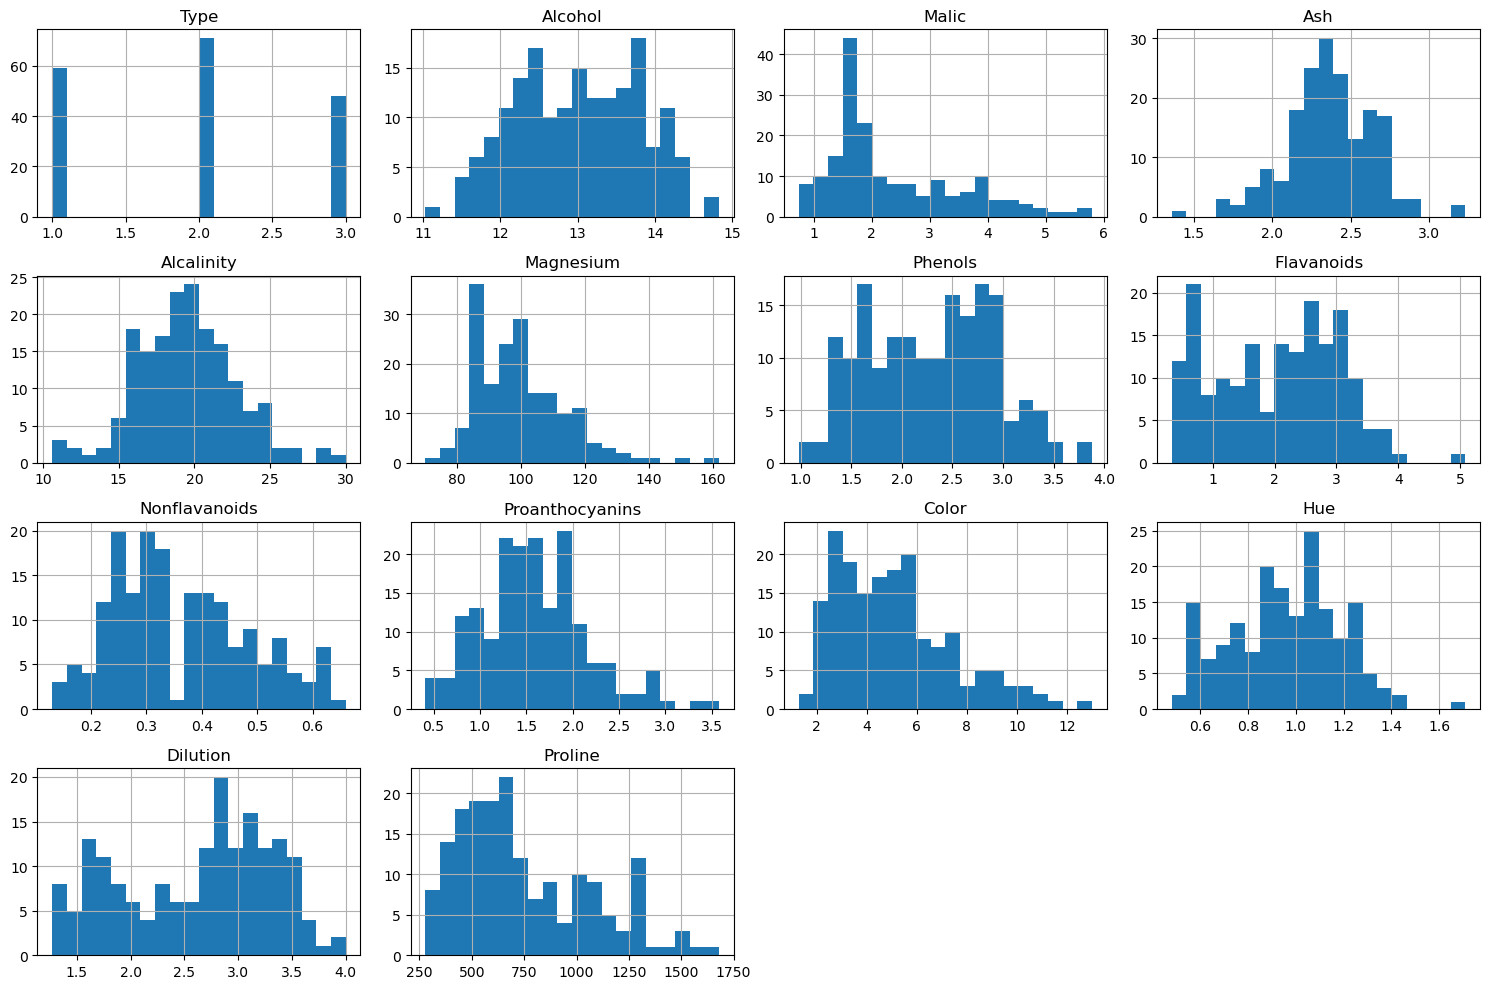

In [5]:
wine.hist(figsize=(15,10),layout=(4,4),bins=20)
plt.tight_layout()
plt.show()

Seems like the data has three types of wine

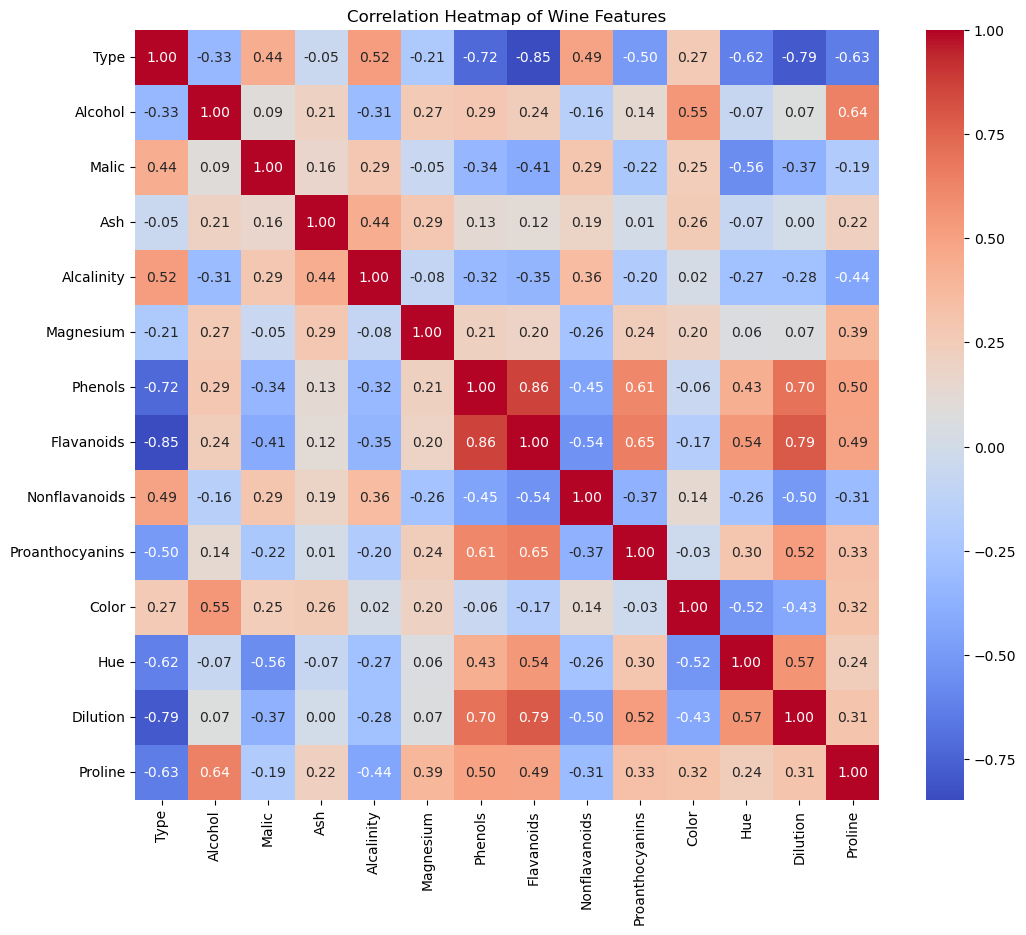

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Wine Features")
plt.show()

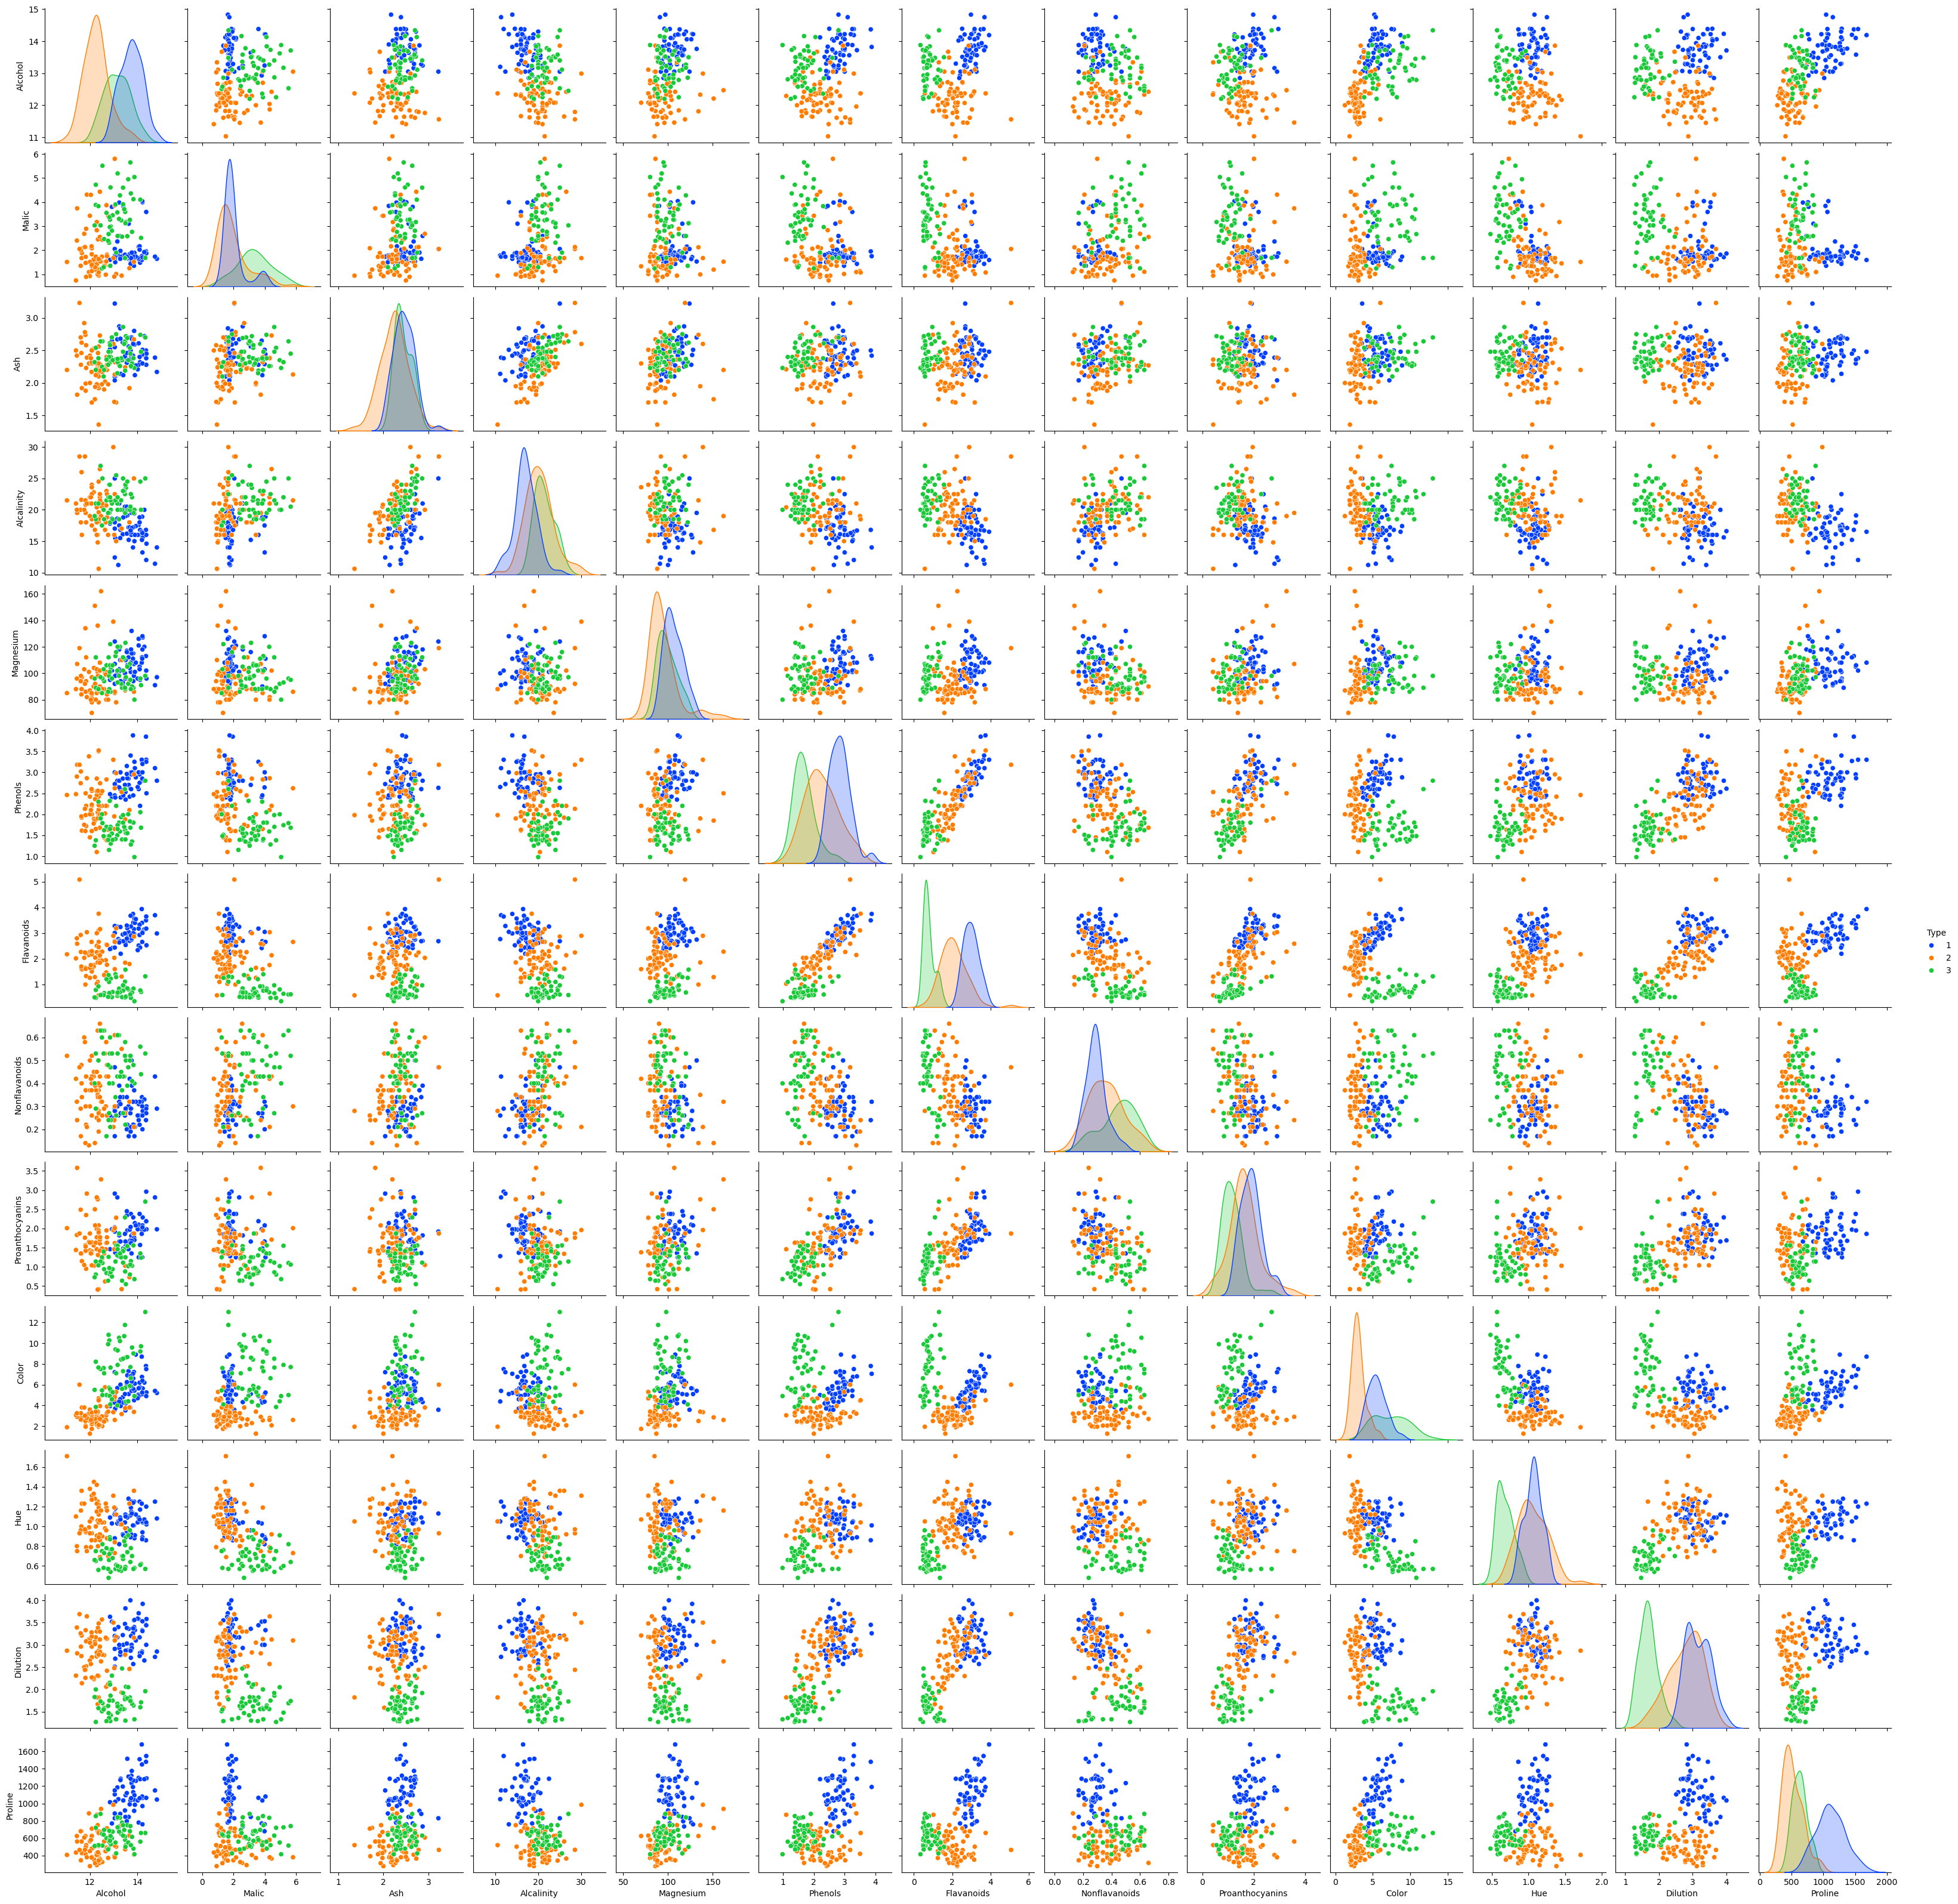

In [8]:
sns.pairplot(wine,hue='Type',palette="bright")

In [9]:
wine.count()

Type               178
Alcohol            178
Malic              178
Ash                178
Alcalinity         178
Magnesium          178
Phenols            178
Flavanoids         178
Nonflavanoids      178
Proanthocyanins    178
Color              178
Hue                178
Dilution           178
Proline            178
dtype: int64

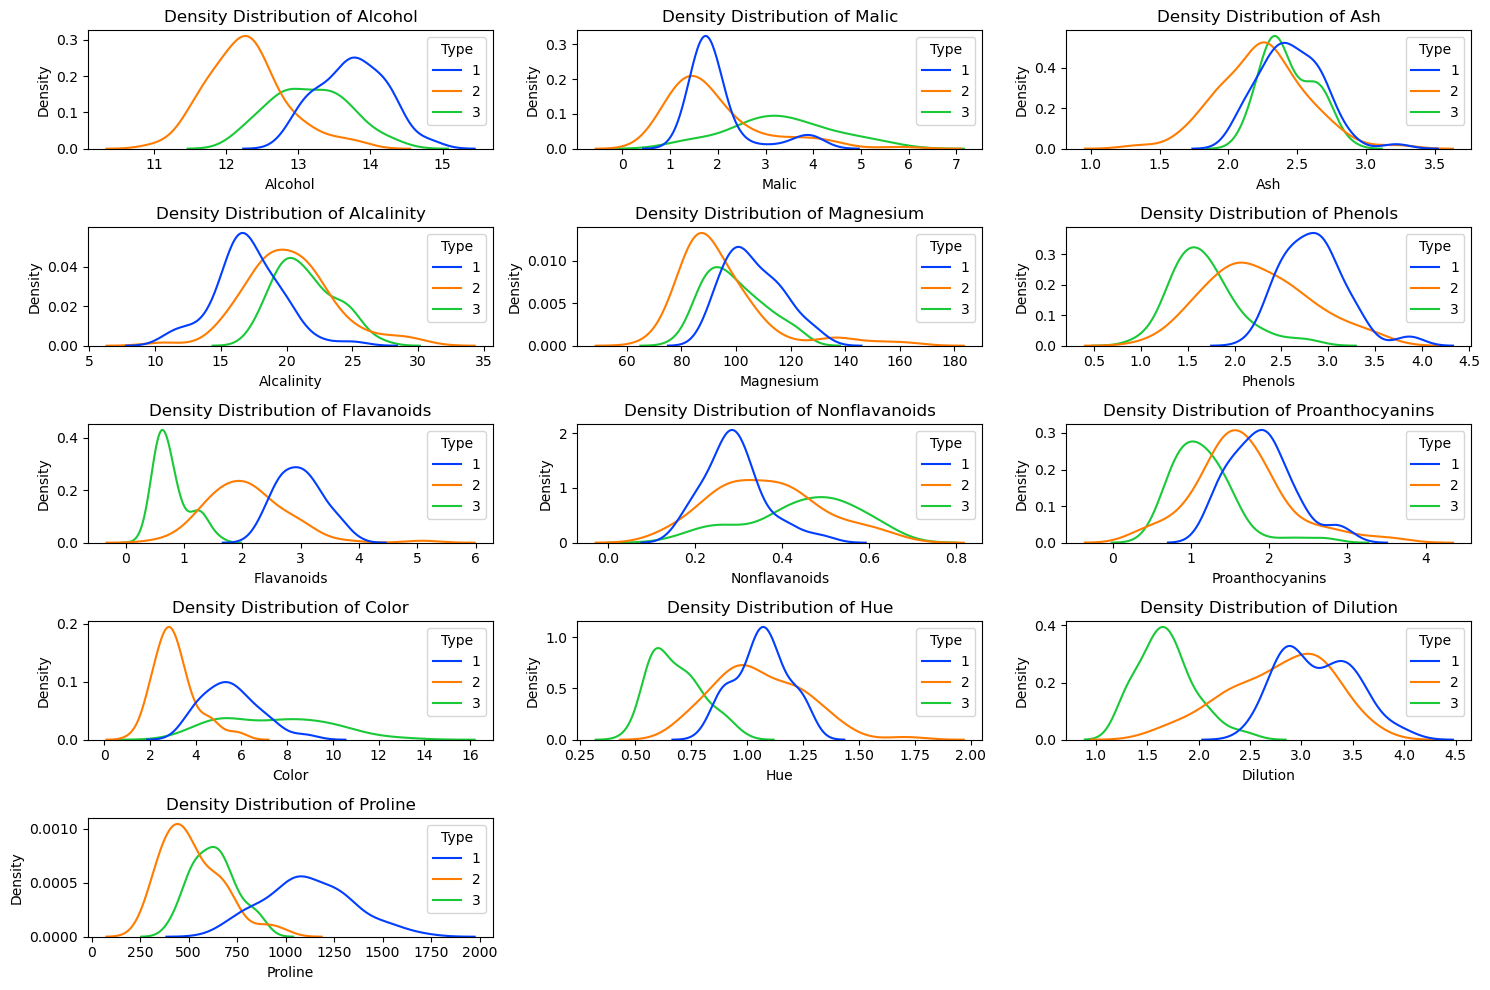

In [10]:
features_to_plot = wine.iloc[:,1:].columns.values
plt.figure(figsize=(15,10))
for i,col in enumerate(features_to_plot):
    plt.subplot(5,3,i+1)
    sns.kdeplot(data=wine,x=col,hue='Type',palette='bright')
    plt.title(f'Density Distribution of {col}')
    plt.tight_layout()

plt.show()

In [11]:
# PCA is unsupervised model and it is very sensitive to scales. So, we will drop Type column and standarize the features

wine_features=wine.drop('Type',axis=1)
scale=StandardScaler()
scaled_wine_features=scale.fit_transform(wine_features)
pca=PCA()
pca_values=pca.fit_transform(scaled_wine_features)

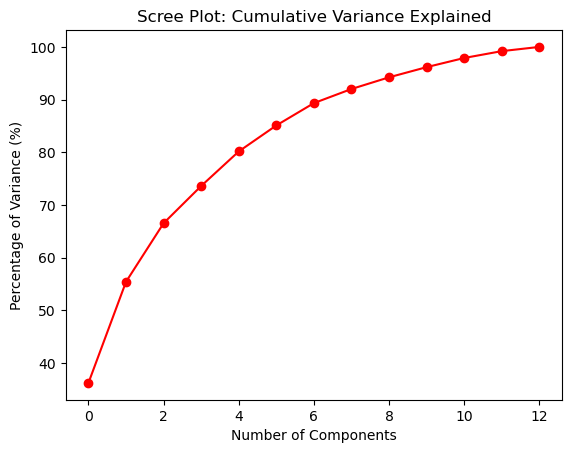

In [12]:
var=pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(var, decimals=4)*100)

plt.plot(cum_var, color="red", marker='o')
plt.title("Scree Plot: Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Percentage of Variance (%)")
plt.show()

Looking at the Scree Plot, the first 3 components explain approximately 66% of the total variance. Therefore, we will transform the data into these 3 components

In [14]:
# --- Clustering on Original Scaled Data ---

kmeans_orig = KMeans(n_clusters=3,n_init=10, random_state=42)
labels_orig = kmeans_orig.fit_predict(scaled_wine_features)
score_orig = silhouette_score(scaled_wine_features, labels_orig)

# --- Clustering on PCA Data (Top 3 Components) ---
pca_3 = PCA(n_components=3)
wine_pca = pca_3.fit_transform(scaled_wine_features)
wine_pca_df=pd.DataFrame(wine_pca,columns=["PC1","PC2","PC3"])
kmeans_pca = KMeans(n_clusters=3,n_init=10, random_state=42)
labels_pca = kmeans_pca.fit_predict(wine_pca)
score_pca = silhouette_score(wine_pca, labels_pca)

print(f"Silhouette Score (Original): {score_orig:.4f}")
print(f"Silhouette Score (PCA Data): {score_pca:.4f}")

Silhouette Score (Original): 0.2849
Silhouette Score (PCA Data): 0.4532


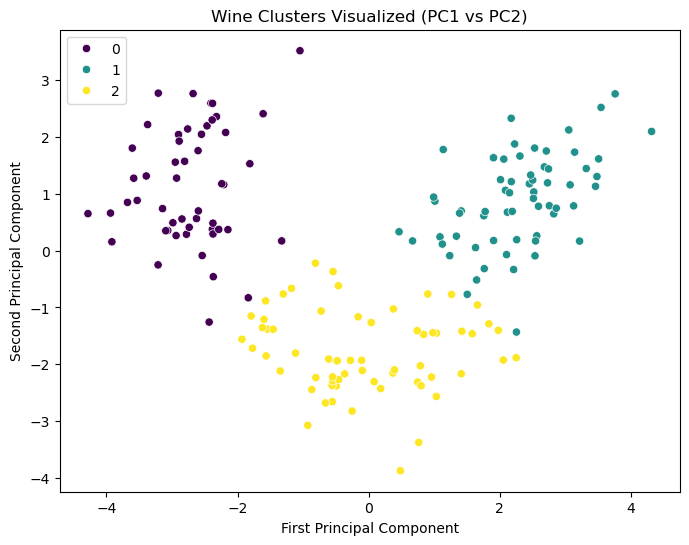

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=labels_pca, palette='viridis')
plt.title('Wine Clusters Visualized (PC1 vs PC2)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

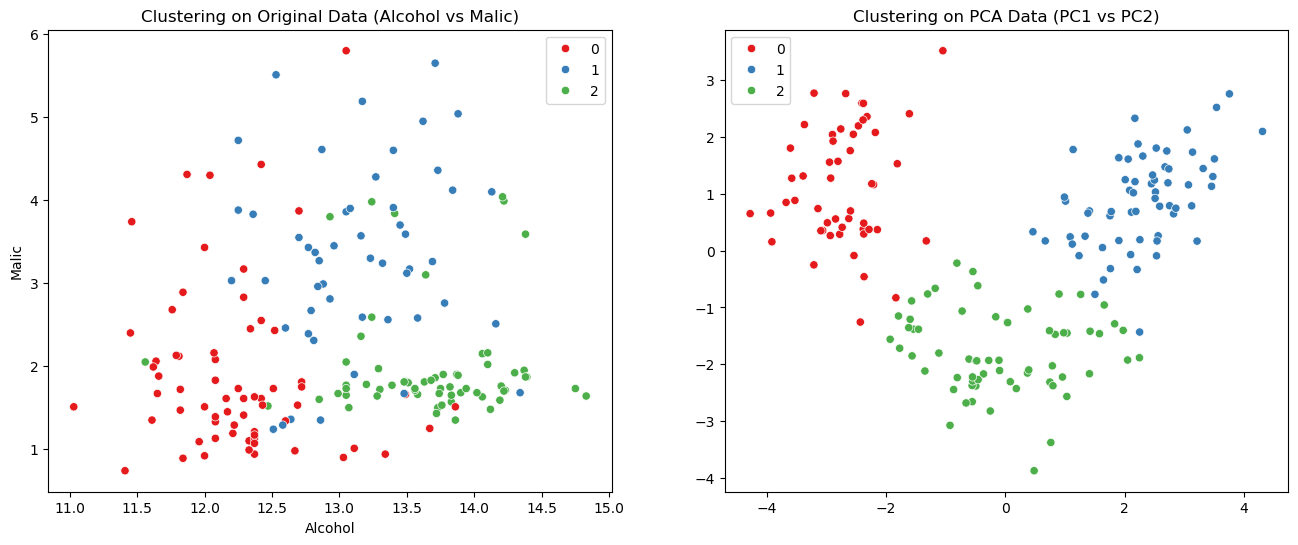

In [16]:
# Create a 1x2 grid to compare original-feature-view vs PCA-view
plt.figure(figsize=(16, 6))

# Subplot 1: Original Data (using two random features)
plt.subplot(1, 2, 1)
sns.scatterplot(x=wine['Alcohol'], y=wine['Malic'], hue=labels_orig, palette='Set1')
plt.title('Clustering on Original Data (Alcohol vs Malic)')

# Subplot 2: PCA Data (PC1 vs PC2)
plt.subplot(1, 2, 2)
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=labels_pca, palette='Set1')
plt.title('Clustering on PCA Data (PC1 vs PC2)')

plt.show()

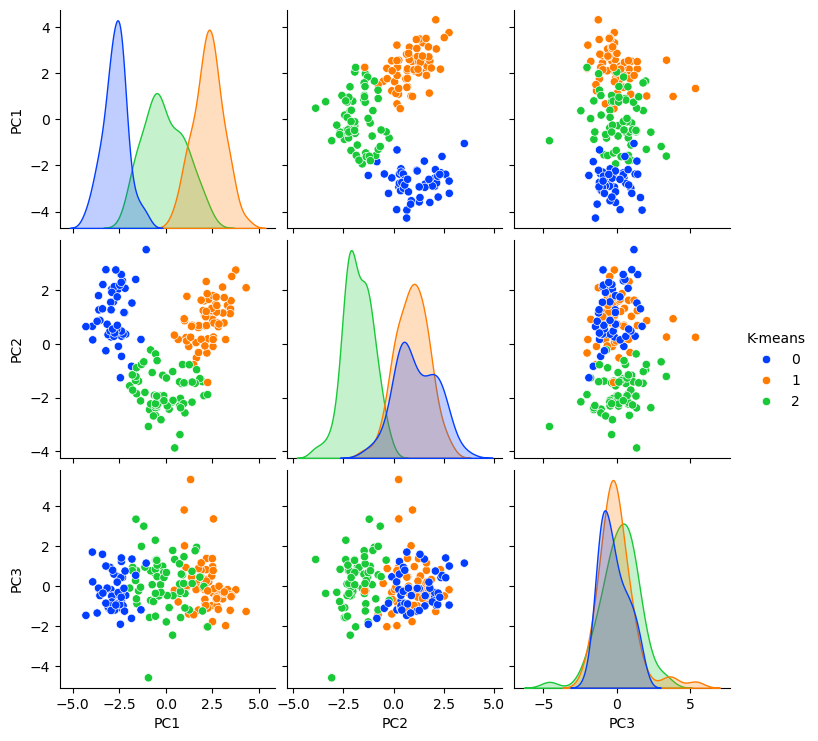

In [17]:
wine_pca_df['K-means']=labels_pca
sns.pairplot(wine_pca_df,hue="K-means",palette="bright")

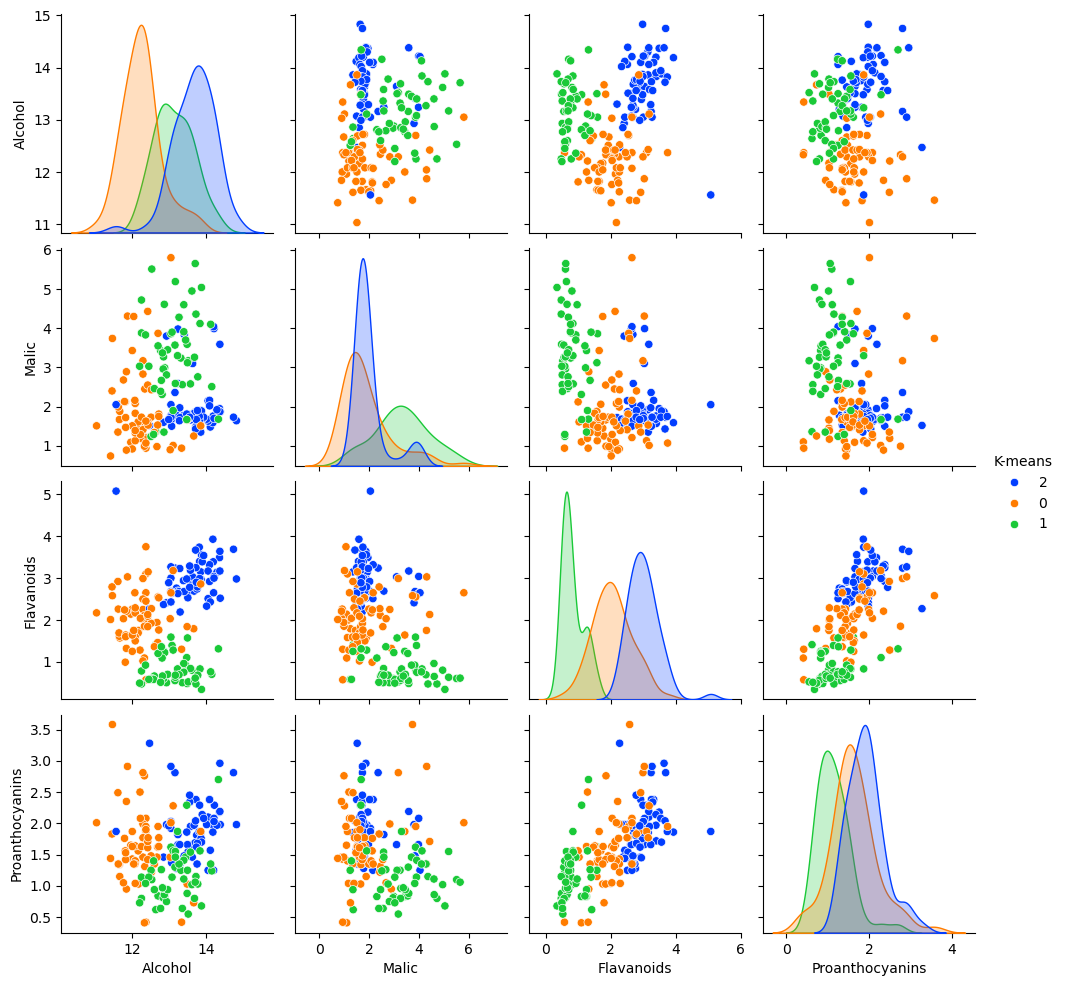

In [18]:
wine["K-means"] = labels_orig.astype(str)

sns.pairplot(wine, 
             vars=['Alcohol', 'Malic', 'Flavanoids','Proanthocyanins'], 
             hue='K-means', 
             palette='bright')
plt.show()

Based on this assignment, it is concluded that while Clustering on original data provides a direct link to chemical features, PCA-assisted clustering is superior for finding distinct segments. The higher Silhouette score and cleaner visualization in the PCA space prove that dimensionality reduction effectively filters out noise, making the underlying structure of the data more apparent. For the Wine dataset, the 3-component PCA model provided the most actionable and mathematically sound clustering solution.

### Key Findings Summary and Insights
- We successfully reduced the dataset from 13 chemical features to 3 Principal Components while retaining approximately 67% of the total variance. This proved that much of the original data was redundant.
#### Clustering Performance: 
- Original Data: K-Means on all 13 features had a lower Silhouette Score because the algorithm was "distracted" by noise and minor variations in less important features
- PCA Data: K-Means on the 3 Principal Components resulted in a higher Silhouette Score. The clusters were physically more compact and further apart, as seen in the PCA pairplot.


### Practical implications of using PCA and clustering in data analysis
- By using PCA we reduce the dimension of the data. In this example we have only 13 features but there could be as much as 100s or 1000s feature with millions of records. which will make the whole pipeline very heavy and it could crash the computer
- PCA provides a way to "see" high-dimensional data. It is practically impossible for a human to visualize 13D space, but through PC1, PC2, and PC3, we can see clear patterns and clusters.

#### When to use direct features over PCA
- only have a few features (e.g., less than 5-8).
- When the business value depends on understanding specific variables.
- The features are independent and not highly correlated.
- When dealing with very small datasets where noise is minimal.

#### When to use PCA 
- high number of features (e.g., 10+ or hundreds).
- When we just need to see the pattern
- The features are highly correlated (Multicollinearity), as seen in this Wine dataset.
- We want to visualize complex data on a 2D or 3D scatter plot
- PCA typically captures the signal in the first few components and leaves the "noise" (random fluctuations) in the later, discarded components.